In [217]:
# Standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn imports
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Tensorflow imports
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.models import Model

## Data Visualization

In [154]:
# Load dataset
df = pd.read_csv("Human_Resources.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [155]:
# Inspect Data
df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [156]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [157]:
# Convert some categorical Variables to Numerical 
columns = ['Attrition','Over18','OverTime']
for col in columns:
  df[col] = df[col].astype("category").cat.codes
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [158]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

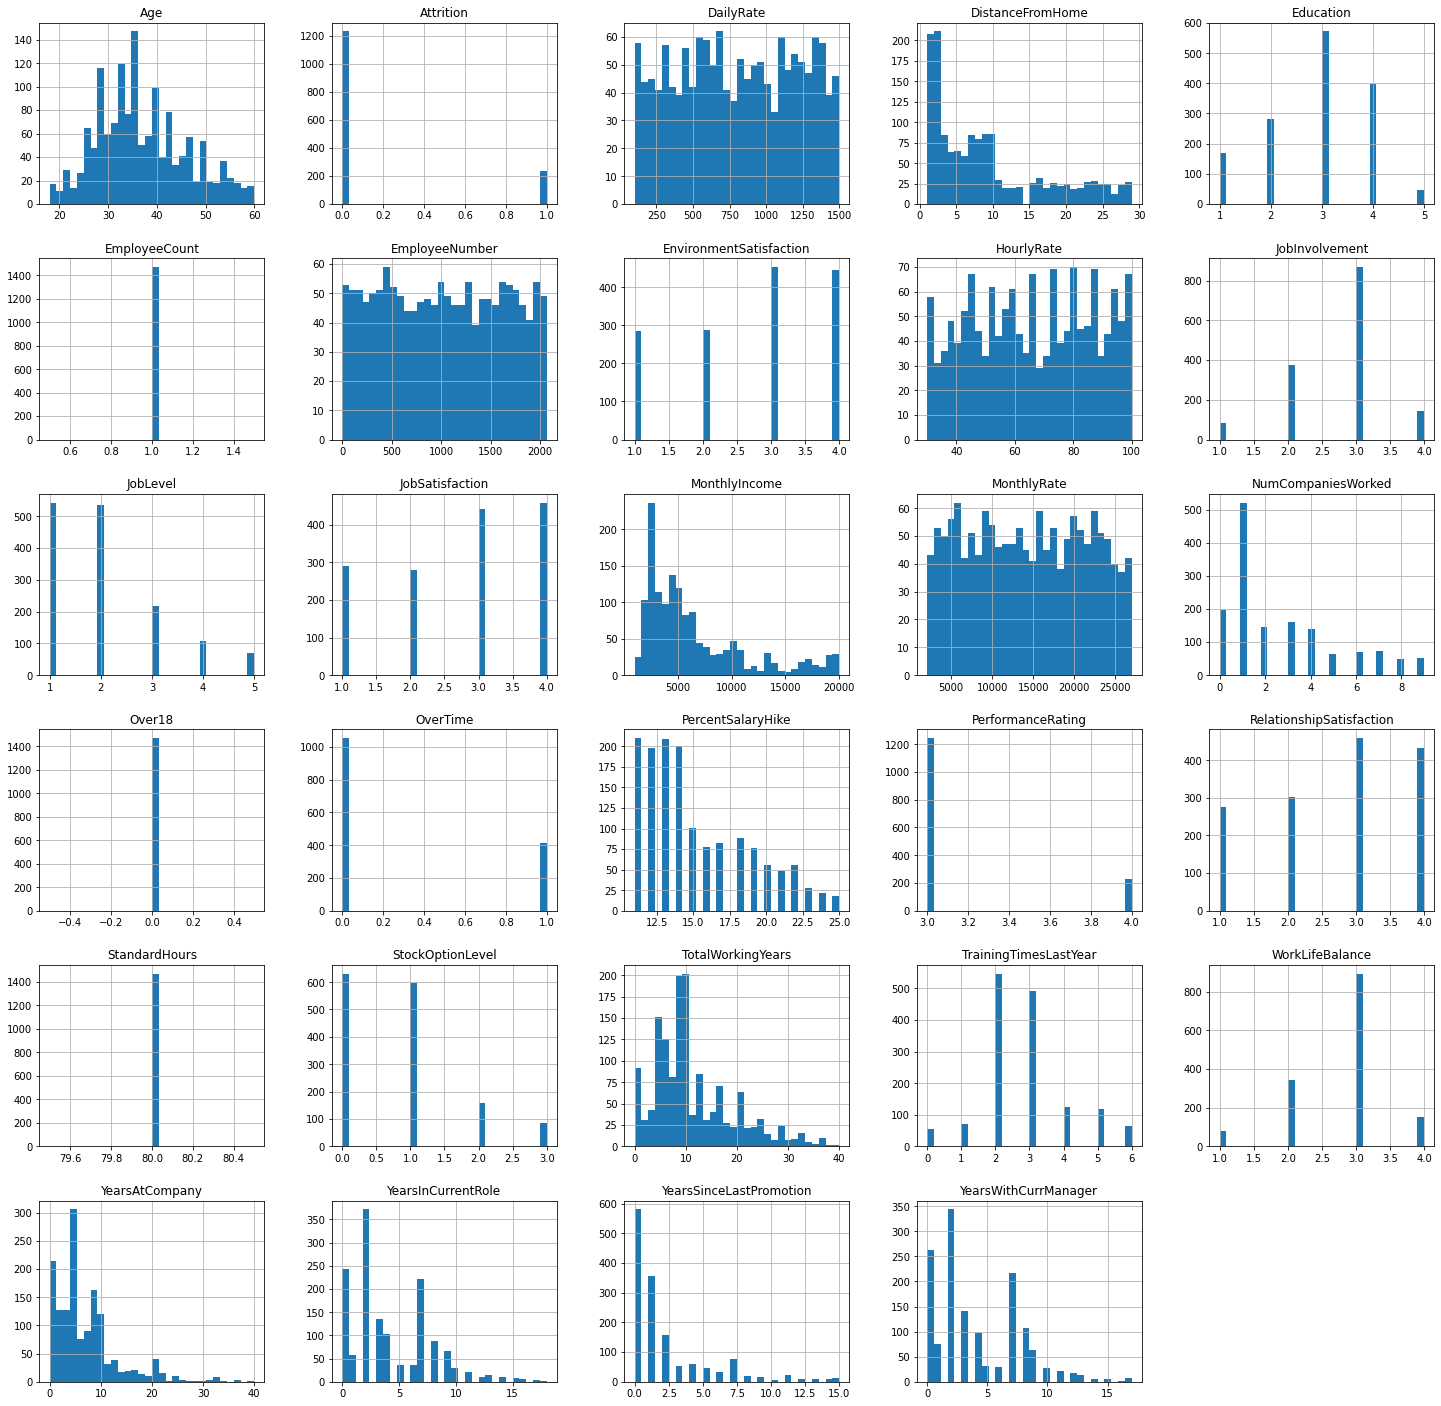

In [159]:
df.hist(bins=30,figsize=(25,25));

In [160]:
# Drop useless columns 
df.drop(["EmployeeNumber","StandardHours","Over18","EmployeeCount"], axis=1, inplace=True)

In [161]:
len(df.columns)

31

In [162]:
# Create dataframes to compare stay/quit ratio
quit_df = df[df['Attrition']==1]
stay_df = df[df['Attrition']==0]

In [163]:
print(f'Number of Employees who left the company: {len(quit_df)}')
print('Percentage of Employees who left the company: %.2f' % float(len(quit_df)/len(df)*100)+'%')


Number of Employees who left the company: 237
Percentage of Employees who left the company: 16.12%


In [164]:
quit_df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,237.000000,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,...,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,33.607595,1.0,750.362869,10.632911,2.839662,2.464135,65.573840,2.518987,1.637131,2.468354,...,3.156118,2.599156,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321
std,9.689350,0.0,401.899519,8.452525,1.008244,1.169791,20.099958,0.773405,0.940594,1.118058,...,0.363735,1.125437,0.856361,7.169204,1.254784,0.816453,5.949984,3.174827,3.153077,3.143349
min,18.000000,1.0,103.000000,1.000000,1.000000,1.000000,31.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,1.0,408.000000,3.000000,2.000000,1.000000,50.000000,2.000000,1.000000,1.000000,...,3.000000,2.000000,0.000000,3.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,32.000000,1.0,699.000000,9.000000,3.000000,3.000000,66.000000,3.000000,1.000000,3.000000,...,3.000000,3.000000,0.000000,7.000000,2.000000,3.000000,3.000000,2.000000,1.000000,2.000000
75%,39.000000,1.0,1092.000000,17.000000,4.000000,4.000000,84.000000,3.000000,2.000000,3.000000,...,3.000000,4.000000,1.000000,10.000000,3.000000,3.000000,7.000000,4.000000,2.000000,5.000000
max,58.000000,1.0,1496.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,15.000000,15.000000,14.000000


In [165]:
stay_df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1233.000000,1233.0,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,...,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000
mean,37.561233,0.0,812.504461,8.915653,2.927007,2.771290,65.952149,2.770479,2.145985,2.778589,...,3.153285,2.733982,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
std,8.888360,0.0,403.208379,8.012633,1.027002,1.071132,20.380754,0.692050,1.117933,1.093277,...,0.360408,1.071603,0.841985,7.760719,1.293585,0.681907,6.096298,3.649402,3.234762,3.594116
min,18.000000,0.0,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,0.0,477.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.0,817.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,6.000000,3.000000,1.000000,3.000000
75%,43.000000,0.0,1176.000000,13.000000,4.000000,4.000000,83.000000,3.000000,3.000000,4.000000,...,3.000000,4.000000,1.000000,16.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,60.000000,0.0,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,38.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


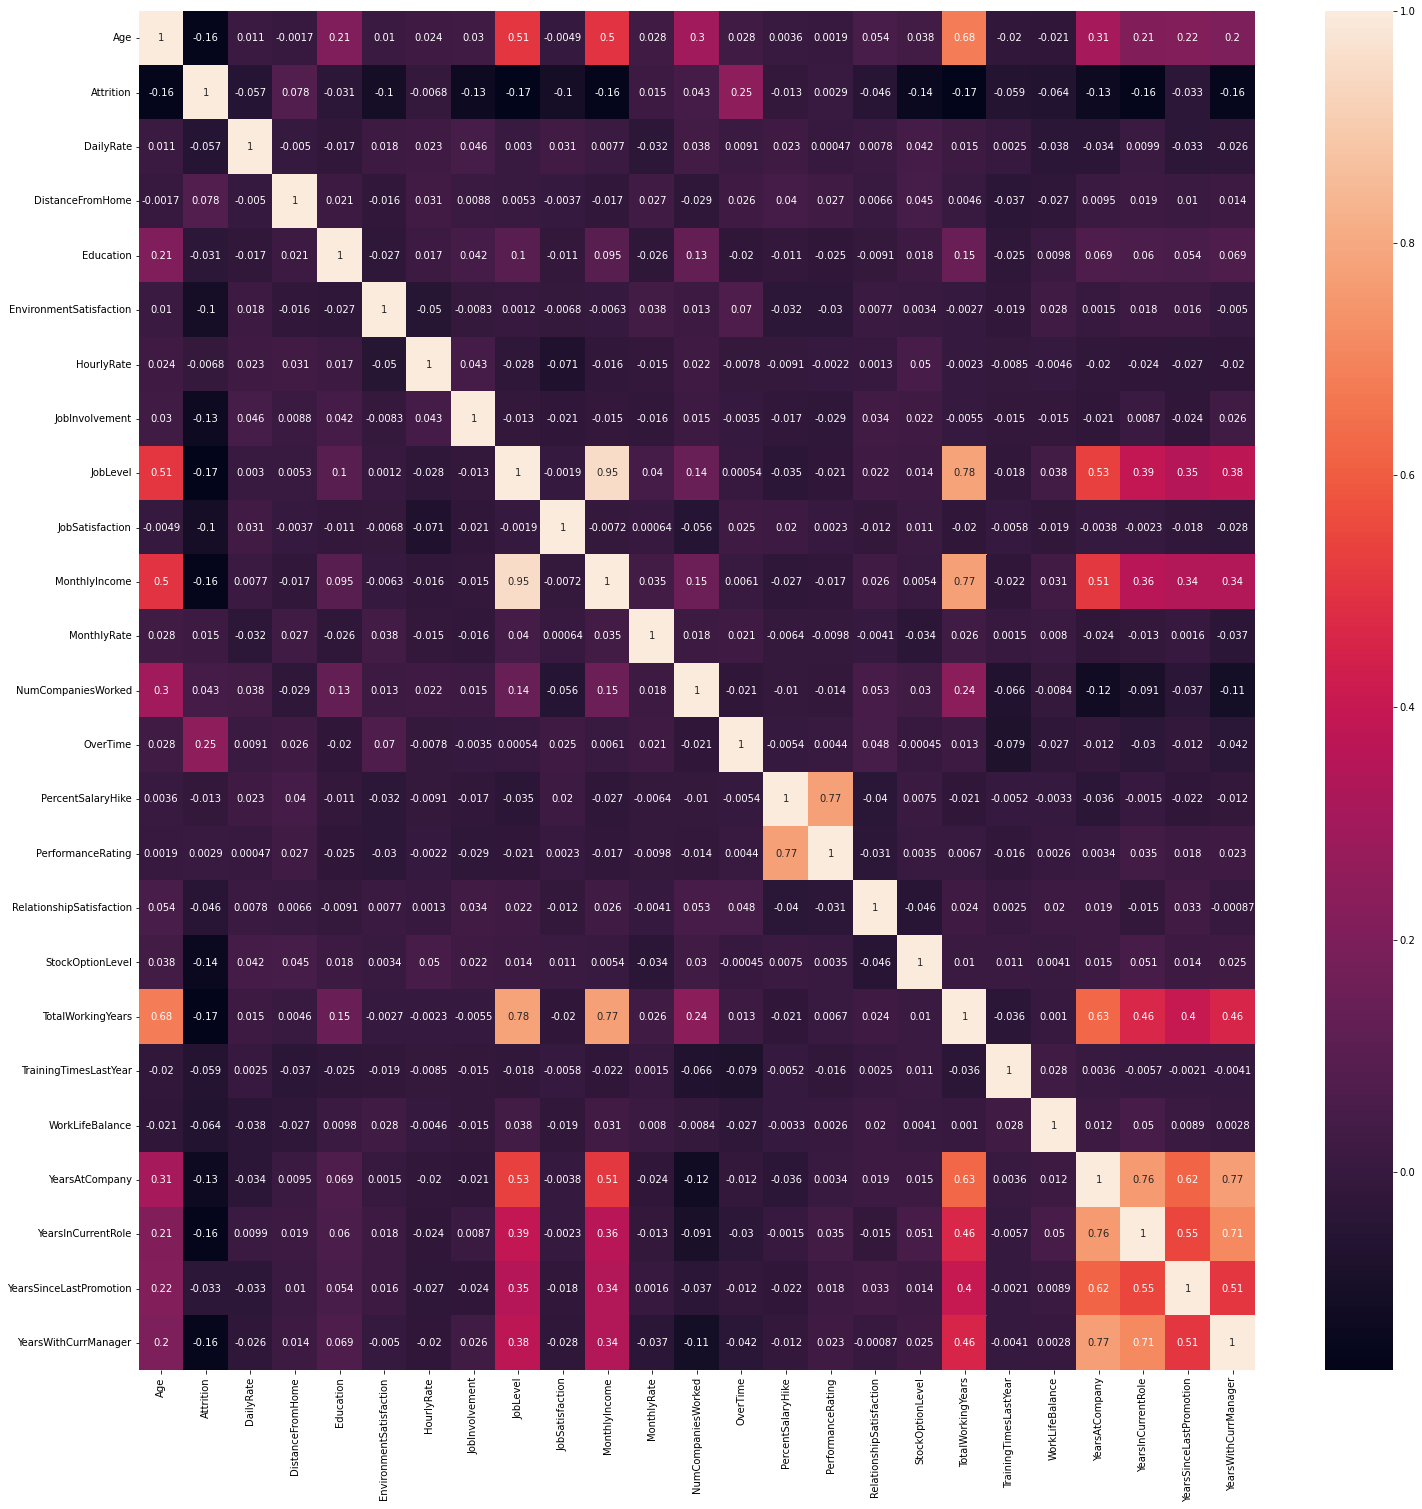

In [166]:
# Generate correlation matrix
corr = df.corr()
fig, ax = plt.subplots(figsize=(25,25))
sns.heatmap(corr,annot=True);

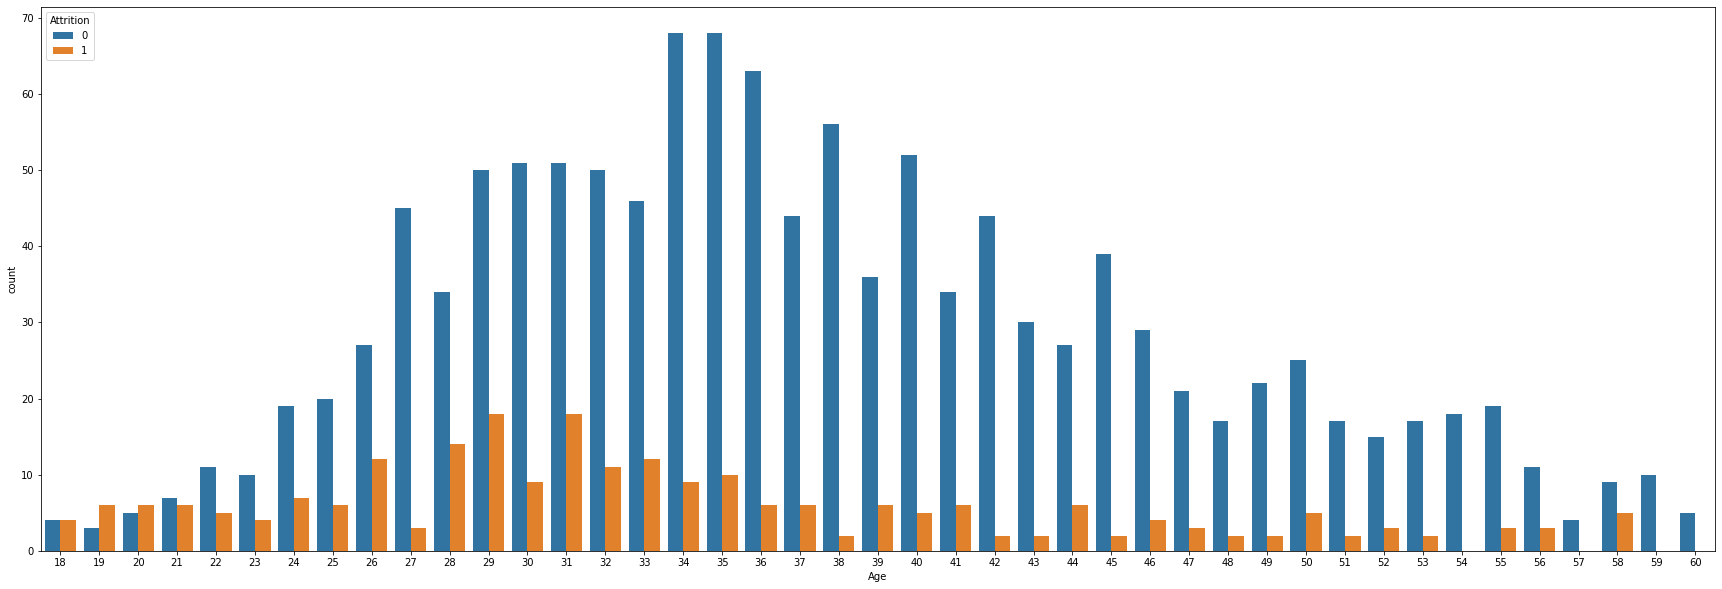

In [167]:
plt.figure(figsize=(30,10))
sns.countplot(x='Age',hue='Attrition',data=df);

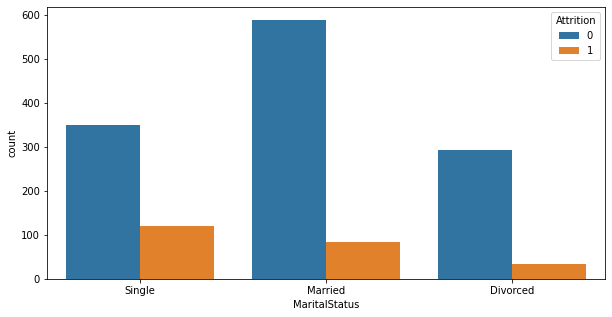

In [168]:
plt.figure(figsize=(10,5))
sns.countplot(x='MaritalStatus',hue='Attrition',data=df);

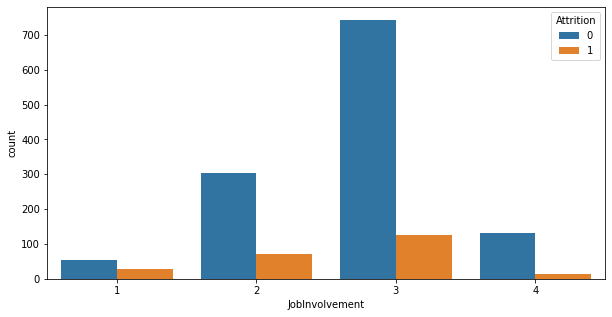

In [169]:
plt.figure(figsize=(10,5))
sns.countplot(x='JobInvolvement',hue='Attrition',data=df);

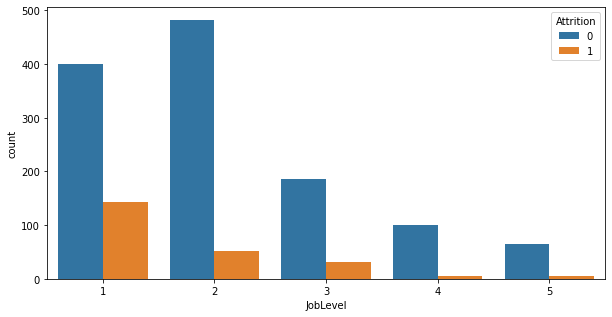

In [170]:
plt.figure(figsize=(10,5))
sns.countplot(x='JobLevel',hue='Attrition',data=df);

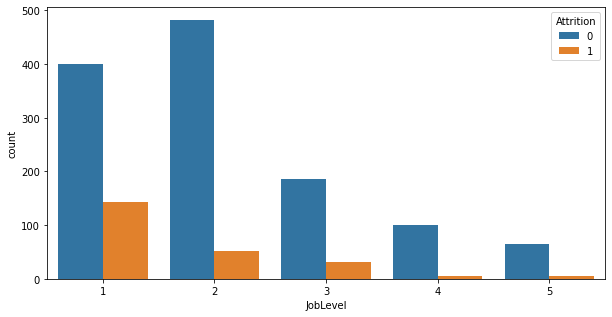

In [171]:
plt.figure(figsize=(10,5))
sns.countplot(x='JobLevel',hue='Attrition',data=df);

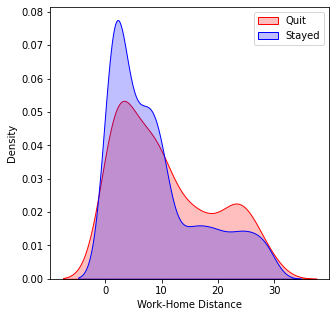

In [172]:
plt.figure(figsize=(5,5))
sns.kdeplot(quit_df['DistanceFromHome'], label='Quit', shade=True,color='r')
sns.kdeplot(stay_df['DistanceFromHome'], label='Stayed', shade=True,color='b')
plt.xlabel("Work-Home Distance")
plt.legend();

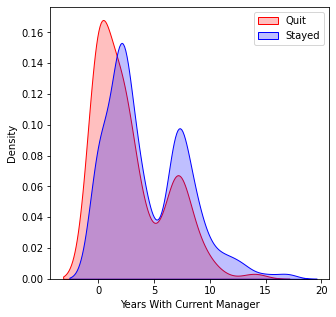

In [173]:
plt.figure(figsize=(5,5))
sns.kdeplot(quit_df['YearsWithCurrManager'], label='Quit', shade=True,color='r')
sns.kdeplot(stay_df['YearsWithCurrManager'], label='Stayed', shade=True,color='b')
plt.xlabel("Years With Current Manager")
plt.legend();

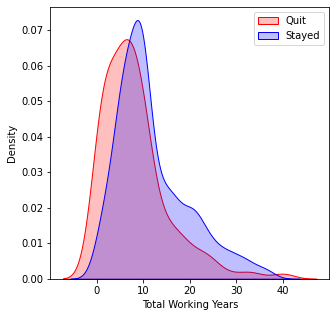

In [174]:
plt.figure(figsize=(5,5))
sns.kdeplot(quit_df['TotalWorkingYears'], label='Quit', shade=True,color='r')
sns.kdeplot(stay_df['TotalWorkingYears'], label='Stayed', shade=True,color='b')
plt.xlabel("Total Working Years")
plt.legend();

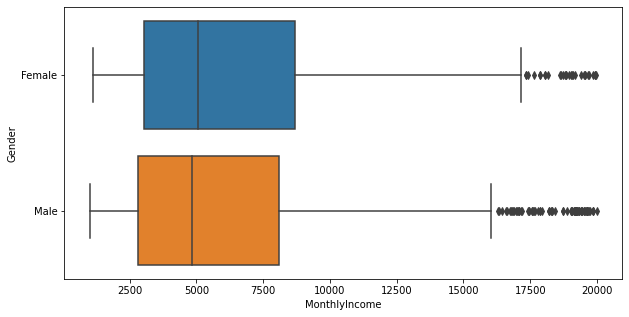

In [175]:
plt.figure(figsize=(10,5))
sns.boxplot(x='MonthlyIncome',y='Gender',data = df);

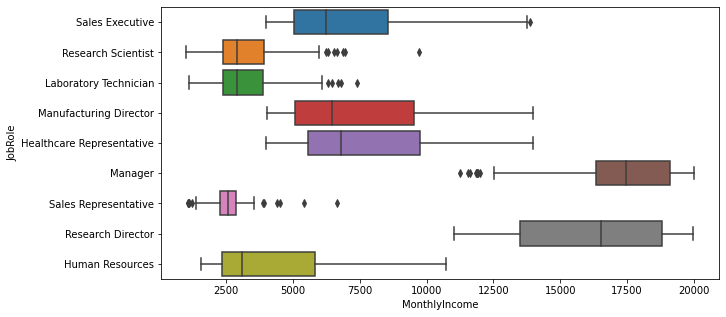

In [176]:
plt.figure(figsize=(10,5))
sns.boxplot(x='MonthlyIncome',y='JobRole',data = df);

## Data Cleaning

In [181]:
# Convert categorical data into numeric data
X_cat = df[['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus']]
one_hot = OneHotEncoder()
X_cat = one_hot.fit_transform(X_cat).toarray()
X_cat = pd.DataFrame(X_cat)
X_cat.shape

(1470, 26)

In [182]:
# Drop the 'categorical' and target columns 
X_num = df.drop(['Attrition',"BusinessTravel","Department","EducationField","Gender","JobRole","MaritalStatus"],axis=1).copy()
X_num.shape

(1470, 24)

In [183]:
# Create 1 big dataframe
X = pd.concat([X_num,X_cat],axis=1)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 50 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1470 non-null   int64  
 1   DailyRate                 1470 non-null   int64  
 2   DistanceFromHome          1470 non-null   int64  
 3   Education                 1470 non-null   int64  
 4   EnvironmentSatisfaction   1470 non-null   int64  
 5   HourlyRate                1470 non-null   int64  
 6   JobInvolvement            1470 non-null   int64  
 7   JobLevel                  1470 non-null   int64  
 8   JobSatisfaction           1470 non-null   int64  
 9   MonthlyIncome             1470 non-null   int64  
 10  MonthlyRate               1470 non-null   int64  
 11  NumCompaniesWorked        1470 non-null   int64  
 12  OverTime                  1470 non-null   int8   
 13  PercentSalaryHike         1470 non-null   int64  
 14  Performa

In [184]:
# Scale data to avoid heavy weights due to large numeric values
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [185]:
y = df["Attrition"]

## Models 

In [207]:
# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)
X_train.shape, y_train.shape

((1102, 50), (1102,))

### Logistic Regression

In [214]:
# Create model, fit into data and make predictions to evaluate
LR = LogisticRegression()
LR.fit(X_train,y_train)
y_pred = LR.predict(X_test)
print('Accuracy: %.2f' % (100 * accuracy_score(y_test,y_pred))+'%')
print('')
print(classification_report(y_test,y_pred))

Accuracy: 90.49%

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       321
           1       0.71      0.43      0.53        47

    accuracy                           0.90       368
   macro avg       0.82      0.70      0.74       368
weighted avg       0.89      0.90      0.89       368



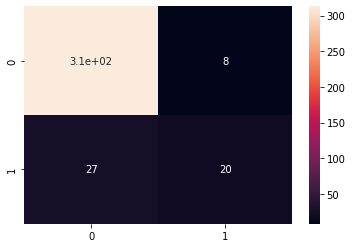

In [215]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True);

### Random Forest

In [210]:
# Create model, fit into data and make predictions to evaluate
RF = RandomForestClassifier()
RF.fit(X_train,y_train)
y_pred = RF.predict(X_test)
print('Accuracy: %.2f' % (100 * accuracy_score(y_test,y_pred))+'%')
print('')
print(classification_report(y_test,y_pred))

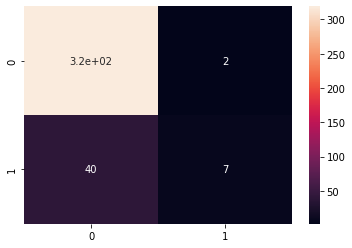

In [212]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True);

### ANN

In [230]:
# Build the ANN
i = Input(shape=X_train[0].shape)
x = Dense(512, activation="relu")(i)
x = Dense(512, activation="relu")(i)
x = Dense(512, activation="relu")(i)
x = Dropout(0.2)(x)
x = Dense(1, activation="sigmoid")(x)

model = Model(i,x)

In [231]:
# Compile and start training
model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])
r = model.fit(X_train,y_train, validation_data=(X_test, y_test), epochs=10,batch_size=50)

Epoch 1/10
23/23 [==============================] - 1s 12ms/step - loss: 0.4670 - accuracy: 0.8167 - val_loss: 0.3458 - val_accuracy: 0.8723
Epoch 2/10
23/23 [==============================] - 0s 5ms/step - loss: 0.3972 - accuracy: 0.8321 - val_loss: 0.3400 - val_accuracy: 0.8750
Epoch 3/10
23/23 [==============================] - 0s 5ms/step - loss: 0.3713 - accuracy: 0.8439 - val_loss: 0.3143 - val_accuracy: 0.8804
Epoch 4/10
23/23 [==============================] - 0s 5ms/step - loss: 0.3494 - accuracy: 0.8494 - val_loss: 0.3071 - val_accuracy: 0.8995
Epoch 5/10
23/23 [==============================] - 0s 4ms/step - loss: 0.3365 - accuracy: 0.8621 - val_loss: 0.3023 - val_accuracy: 0.9049
Epoch 6/10
23/23 [==============================] - 0s 7ms/step - loss: 0.3292 - accuracy: 0.8684 - val_loss: 0.2924 - val_accuracy: 0.8967
Epoch 7/10
23/23 [==============================] - 0s 4ms/step - loss: 0.3211 - accuracy: 0.8739 - val_loss: 0.2861 - val_accuracy: 0.9103
Epoch 8/10
23/23 [=

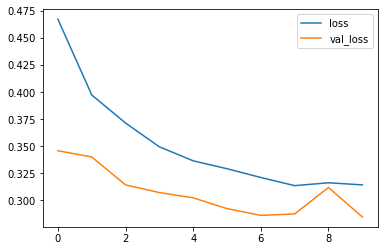

In [232]:
plt.plot(r.history["loss"],label="loss")
plt.plot(r.history["val_loss"],label="val_loss")
plt.legend();

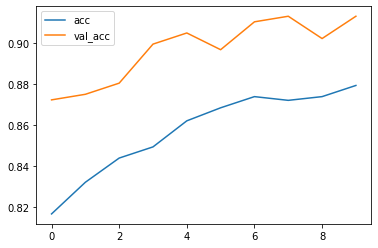

In [233]:
plt.plot(r.history["accuracy"],label="acc")
plt.plot(r.history["val_accuracy"],label="val_acc")
plt.legend();

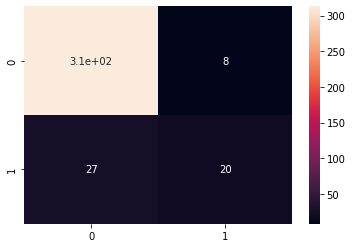

In [234]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True);